# 🌳 Tree-Based Models 总览介绍

树模型是一类结构类似于“决策树”的机器学习模型，因其高度可解释性和在工业应用中的出色表现，广泛应用于分类、回归、排序等任务中。

---

## 🔍 为什么学习树模型？

- ✅ **强泛化能力**：特别是集成树模型（如 Random Forest、XGBoost）在小样本下表现优异
- ✅ **易解释性**：可视化每一步分裂逻辑，便于业务落地
- ✅ **非线性建模**：无需特征归一化，能自动处理特征之间的复杂交互关系
- ✅ **适用于结构化数据**：在 Kaggle 等竞赛中表现极佳，尤其适合表格类数据

---

## 🌲 本模块包含以下模型：

| 模型名称       | 类型        | 特点与应用场景                           |
|----------------|-------------|-------------------------------------------|
| Decision Tree  | 基础模型     | 直观简单，适合教学、解释性要求高的任务     |
| Random Forest  | Bagging 集成 | 训练速度快，抗过拟合，适合初始 baseline    |
| GBDT           | Boosting 集成 | 每轮拟合残差，逐步逼近目标函数           |
| XGBoost        | GBDT升级版   | 引入正则项、支持并行、精度与效率俱佳     |
| LightGBM       | GBDT进阶版   | 更快更轻量，适合大规模稀疏特征的数据集   |

---

## 📊 典型应用场景

- 信用评分模型（金融）
- 用户流失预测（电商、广告）
- 预测房价、销量、CTR 等结构化回归任务
- 特征重要性排序（特征选择）

---

## 📦 使用工具库

- `sklearn.tree.DecisionTreeClassifier`
- `sklearn.ensemble.RandomForestClassifier`
- `xgboost.XGBClassifier`
- `lightgbm.LGBMClassifier`

# 🌳 Decision Tree 决策树

## 📘 模型简介

决策树是一种树状结构的监督学习模型，用于分类和回归任务。它通过不断对特征进行条件判断（如“是否大于某个值”），将数据划分成越来越纯的子集，直到满足停止条件。

直观易懂、易于可视化，是许多复杂模型（如随机森林和梯度提升树）的基础。

---

## 🧮 数学原理与构建流程

1. **特征选择：选择最优特征进行分裂**
   - 分类任务：选择 Gini 指数 / 信息增益 最大的特征
   - 回归任务：选择 MSE（均方误差）最小的分裂点

2. **递归分裂：对子节点继续重复上一步，直到满足终止条件**
   - 最大深度限制
   - 最小样本数限制
   - 叶节点纯度阈值等

3. **剪枝（Pruning）：防止过拟合**
   - 预剪枝（提前停止分裂）
   - 后剪枝（构建完树再回退简化）

---

## 📐 常用分裂标准

### ✅ 分类任务

| 指标         | 定义公式                                      | 特点                         |
|--------------|-----------------------------------------------|------------------------------|
| 信息增益     | $IG(D, A) = H(D) - \sum_i \frac{|D_i|}{|D|}H(D_i)$ | 来自 ID3，偏向多值特征       |
| Gini 指数    | $Gini(D) = 1 - \sum_k p_k^2$                   | 来自 CART，更常用            |
| 信息增益率   | $\text{Gain Ratio} = \frac{IG}{H(A)}$         | 来自 C4.5，纠正偏向性问题     |

### ✅ 回归任务

- 使用均方误差（MSE）或绝对误差（MAE）：
  $$
  MSE = \frac{1}{n} \sum_{i=1}^{n} (y_i - \hat{y}_i)^2
  $$

---

## ⚙️ 模型参数（以 sklearn 为例）

| 参数名            | 说明                         |
|-------------------|------------------------------|
| `criterion`       | 分裂标准：`gini`, `entropy`, `mse`, `friedman_mse` |
| `max_depth`       | 树最大深度                   |
| `min_samples_split` | 分裂所需的最小样本数       |
| `min_samples_leaf` | 叶节点最少样本数            |
| `max_features`    | 每次分裂时考虑的最大特征数   |

---

## ✅ 优点

- 易于理解和可视化
- 适用于数值型和类别型特征
- 不需要特征标准化
- 可以处理多分类任务

## ⚠️ 缺点

- 容易过拟合（尤其是深树）
- 不稳定：微小数据扰动可能导致结构剧变
- 对连续变量划分不够精细（相比线性模型）

---

## 📌 常见应用

- 客户细分与标签分类
- 信贷风险评估
- 可解释性要求强的商业场景


In [18]:
# import sys
# sys.path.append("..")

import matplotlib.pyplot as plt
from data_pipeline import evaluate_model, load_bank_data, build_pipeline
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc, accuracy_score
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

## 🌳 基于 Pipeline 的 Decision Tree 简单实现（Naive Implementation）

本节展示如何使用 `sklearn.pipeline.Pipeline` 构建一个端到端的机器学习工作流，来对银行营销数据（bank.csv）进行二分类建模，模型选择为 `DecisionTreeClassifier`。

此实现为**基础版本（Naive Implementation）**，用于展示以下关键步骤的整合：

- 📦 数据预处理（数值特征标准化 + 类别特征独热编码）
- 🧱 Pipeline 管道封装，便于统一训练与预测
- 🌲 使用基础的 `DecisionTreeClassifier`（未调参，max_depth 设为 5）
- 📊 模型评估指标输出（准确率、分类报告、混淆矩阵）
- 🧪 模型性能可视化（ROC 曲线 + AUC）




 Classification Report (Logistic Regression):
               precision    recall  f1-score   support

           0       0.92      0.96      0.94       801
           1       0.53      0.33      0.40       104

    accuracy                           0.89       905
   macro avg       0.72      0.64      0.67       905
weighted avg       0.87      0.89      0.88       905

 Confusion Matrix:
 [[771  30]
 [ 70  34]]
 Accuracy: 0.8895


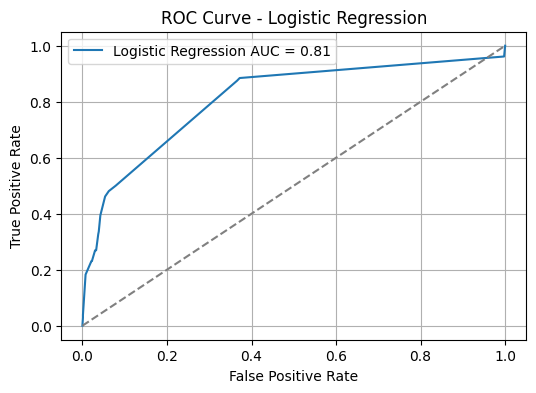

In [16]:
# 加载数据
X, y, categorical_cols, numerical_cols = load_bank_data('bank.csv')

# 划分训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

dt_model = DecisionTreeClassifier(criterion="gini", max_depth=5, random_state=42)

# 构建 Pipeline
pipeline_dt = build_pipeline(numerical_cols, categorical_cols, dt_model)

# 模型训练与评估
pipeline_dt.fit(X_train, y_train)

#评估
evaluate_model(pipeline_dt, X_test, y_test, model_name="Logistic Regression")


# 🌲 Random Forest（随机森林）

## 📘 模型简介

随机森林是由多个**决策树**组成的集成学习模型。它通过对不同子集数据和特征进行随机采样，训练出多个决策树，然后将这些树的预测结果进行集成（多数投票或平均），从而提升模型的准确率并降低过拟合风险。

它属于 **Bagging（Bootstrap Aggregating）** 框架的代表模型。

---

## 🧠 构建流程

1. **Bootstrap 采样**：
   - 从原始数据中有放回地随机采样出多个训练子集（每棵树一个子集）

2. **特征子集随机选取**：
   - 每次分裂节点时，随机选取特征的一个子集用于寻找最优分裂点（不是全特征）

3. **训练多棵决策树**：
   - 每棵树都是在不同数据+特征子集上训练而成

4. **结果集成**：
   - 分类任务：多数投票  
   - 回归任务：平均预测值

---

## ⚙️ 常用参数（sklearn）

| 参数名 | 含义 |
|--------|------|
| `n_estimators` | 树的数量（默认100） |
| `max_depth` | 每棵树的最大深度 |
| `max_features` | 每次分裂考虑的最大特征数（默认 √d） |
| `min_samples_split` | 内部节点最小样本分裂数 |
| `bootstrap` | 是否使用有放回采样 |
| `oob_score` | 是否使用袋外样本估计泛化误差 |

---

## ✅ 优点

- 抗过拟合能力强
- 能处理高维数据和缺失数据
- 对异常值不敏感
- 特征重要性评估方便

## ⚠️ 缺点

- 不易解释（比单棵树难理解）
- 模型体积大、推理慢
- 在稀疏数据或高时间序列中不总是最优

---

## 📊 应用场景

- 客户流失预测
- 信用评分
- 医疗风险预测
- 图像分类中的特征选择

---

## 🔁 与决策树比较

| 对比项           | 决策树        | 随机森林      |
|------------------|----------------|----------------|
| 是否集成模型     | ❌ 否          | ✅ 是           |
| 是否容易过拟合   | ✅ 是          | ❌ 抗过拟合     |
| 可解释性         | ✅ 强          | ❌ 较弱         |
| 表现稳定性       | ❌ 对数据敏感   | ✅ 更稳定       |


 Classification Report (Random Forest):
               precision    recall  f1-score   support

           0       0.89      1.00      0.94       801
           1       0.69      0.09      0.15       104

    accuracy                           0.89       905
   macro avg       0.79      0.54      0.55       905
weighted avg       0.87      0.89      0.85       905

 Confusion Matrix:
 [[797   4]
 [ 95   9]]
 Accuracy: 0.8906


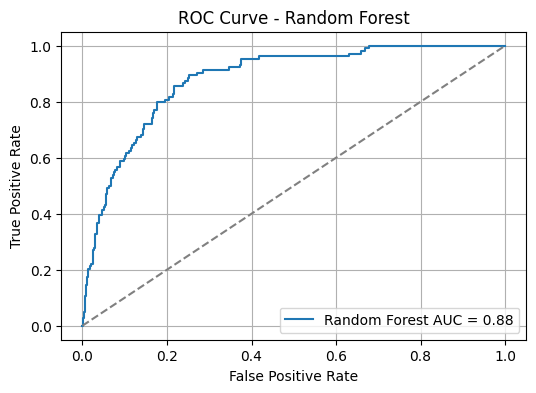

In [13]:
# 构建 pipeline（用 RandomForestClassifier）
rf_model = RandomForestClassifier(
    n_estimators=100,
    max_depth=5,
    random_state=42,
    oob_score=True,
    n_jobs=-1
)

pipeline_rf = build_pipeline(numerical_cols, categorical_cols, rf_model)

# 模型训练
pipeline_rf.fit(X_train, y_train)

# 模型预测与评估
evaluate_model(pipeline_rf, X_test, y_test, model_name="Random Forest")

# 🔥 GBDT（Gradient Boosted Decision Trees）

## 📘 模型简介

GBDT 是一种基于梯度提升思想的集成学习模型。它通过**逐步拟合前一轮的残差**，构建一系列弱分类器（通常是小决策树），并将它们加权累加来提升整体预测能力。

与 Random Forest 的“并行 Bagging”不同，GBDT 是一个**串行 Boosting 过程**，每一棵树依赖于前一棵树的误差信息。

---

## 🧠 构建流程

1. **初始化模型**：
   - 分类：初始概率值（如 log odds）
   - 回归：初始预测均值

2. **计算残差**：
   - 每一轮训练目标是当前模型预测值与真实值之间的残差（或负梯度）

3. **训练新树拟合残差**：
   - 用一棵新的小决策树来学习残差

4. **更新模型预测**：
   - 加上一个 shrinked 的新树输出（学习率控制）

5. **重复上述步骤若干轮，直到达到指定轮数或误差收敛**

---

## 📐 数学原理（简化）

目标是最小化损失函数 \( L(y, F(x)) \)，其中 \( F(x) \) 是当前模型的预测：

1. 每一轮 \( m \) 拟合残差：
   $$
   r_i^{(m)} = -\left[ \frac{\partial L(y_i, F(x_i))}{\partial F(x_i)} \right]
   $$

2. 拟合一棵回归树 \( h_m(x) \) 对残差建模

3. 更新模型：
   $$
   F_{m}(x) = F_{m-1}(x) + \eta \cdot h_m(x)
   $$

其中 \( \eta \in (0, 1] \) 是学习率（Shrinkage）

---

## ⚙️ 常用参数

| 参数名              | 含义 |
|---------------------|------|
| `n_estimators`      | 树的数量（迭代轮数） |
| `learning_rate`     | 学习率，控制每棵树的贡献 |
| `max_depth`         | 每棵树的最大深度 |
| `subsample`         | 训练每棵树时使用的样本比例（降低过拟合） |
| `min_samples_split` | 节点最小分裂样本数 |
| `loss`              | 损失函数，如 `deviance`（log loss）等 |

---

## ✅ 优点

- 精度高，Kaggle 夺冠常用
- 能处理各种类型数据（连续、离散）
- 支持回归与分类
- 可加正则控制过拟合

## ⚠️ 缺点

- 训练速度慢，串行过程难并行
- 对参数敏感，调参较复杂
- 不如 RF 抗噪声

---

## 🆚 GBDT vs Random Forest

| 项目             | Random Forest     | GBDT (Boosting)       |
|------------------|-------------------|------------------------|
| 样本处理         | 并行抽样（Bagging） | 顺序建模（Boosting）     |
| 每棵树目标       | 独立建模           | 拟合残差 / 负梯度       |
| 抗过拟合         | 强                | 需调参防过拟合          |
| 并行化训练       | ✅ 易并行          | ❌ 串行训练慢             |

 Classification Report (Gradient Boosted Trees):
               precision    recall  f1-score   support

           0       0.92      0.96      0.94       801
           1       0.54      0.38      0.45       104

    accuracy                           0.89       905
   macro avg       0.73      0.67      0.69       905
weighted avg       0.88      0.89      0.88       905

 Confusion Matrix:
 [[767  34]
 [ 64  40]]
 Accuracy: 0.8917


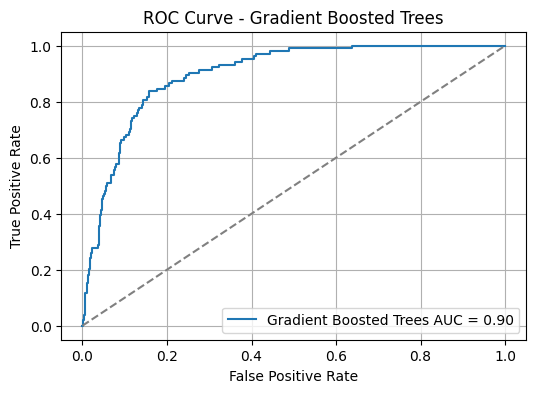

In [14]:
gbdt_model = GradientBoostingClassifier(
    n_estimators=100,
    learning_rate=0.1,
    max_depth=3,
    subsample=0.8,
    random_state=42
)

pipeline_gb = build_pipeline(numerical_cols, categorical_cols, gbdt_model)

# 4. 训练模型
pipeline_gb.fit(X_train, y_train)

# 5. 评估模型
evaluate_model(pipeline_gb, X_test, y_test, model_name="Gradient Boosted Trees")


# ⚡️ XGBoost（Extreme Gradient Boosting）

## 📘 模型简介

XGBoost 是一种基于梯度提升（Gradient Boosting）的集成模型，被广泛应用于工业界和数据竞赛中。它是 GBDT 的高效工程实现版本，专为速度和性能优化，具备出色的泛化能力和训练效率。

“XGBoost” 的全称是 **eXtreme Gradient Boosting**。

---

## 🚀 相较原始 GBDT 的关键优化

| 特性                  | GBDT (sklearn)      | XGBoost                     |
|-----------------------|---------------------|-----------------------------|
| 正则化控制            | ❌ 无                | ✅ L1 / L2 支持              |
| 样本处理              | 顺序残差拟合        | 同上                        |
| 特征分裂              | 精确贪心搜索        | 支持近似分裂算法（加速）    |
| 并行化建树            | ❌ 串行              | ✅ 特征级并行化              |
| 缓存优化              | ❌ 无                | ✅ 高效缓存结构              |
| 稀疏数据支持          | 一般                | ✅ 原生支持                  |
| 自定义损失函数        | ❌ 不支持            | ✅ 支持任意一阶/二阶损失函数 |

---

## 📐 数学原理简述

XGBoost 目标函数加入了正则化项：

$$
\mathcal{L} = \sum_{i=1}^{n} l(y_i, \hat{y}_i^{(t)}) + \sum_{k=1}^{t} \Omega(f_k)
$$

其中：

- $( \hat{y}_i^{(t)} $)：第 \( t \) 轮的预测值
- $( \Omega(f_k) = \gamma T + \frac{1}{2} \lambda \sum_j w_j^2 $)：正则项（树复杂度）

二阶泰勒展开目标函数，使用一阶梯度 $( g_i $) 和二阶导数 $( h_i $) 作为每轮分裂优化目标。

---

## ⚙️ 常用参数（`XGBClassifier`）

| 参数名              | 含义 |
|---------------------|------|
| `n_estimators`      | 树的数量（Boosting 轮数） |
| `max_depth`         | 每棵树的最大深度 |
| `learning_rate`     | 步长 shrinkage，控制每棵树影响 |
| `subsample`         | 每轮训练用样本比例 |
| `colsample_bytree`  | 每棵树训练用特征比例 |
| `reg_alpha`         | L1 正则项系数 |
| `reg_lambda`        | L2 正则项系数 |
| `eval_metric`       | 评估指标，如 `'logloss'`, `'auc'` |

---

## ✅ 优点总结

- 🚀 训练速度快，支持多线程并行计算
- 🧠 泛化能力强，抗过拟合（正则化）
- 📦 原生支持稀疏数据、类别缺失
- 📊 可用于分类、回归、排序、多分类等多任务
- 🔧 支持自定义损失函数和评估指标

---

## ⚠️ 缺点

- 模型较重，推理速度略慢（可用 LightGBM 优化）
- 对超参数敏感，需要调参
- 不如线性模型解释性强

---

## 💡 应用场景

- Kaggle / 天池 等竞赛中最常见模型之一
- 信贷评分、CTR 预估、风控预测
- 特征重要性排序、缺失值容错强的任务



 Classification Report (XGBoost):
               precision    recall  f1-score   support

           0       0.92      0.97      0.94       801
           1       0.58      0.37      0.45       104

    accuracy                           0.90       905
   macro avg       0.75      0.67      0.69       905
weighted avg       0.88      0.90      0.89       905

 Confusion Matrix:
 [[773  28]
 [ 66  38]]
 Accuracy: 0.8961


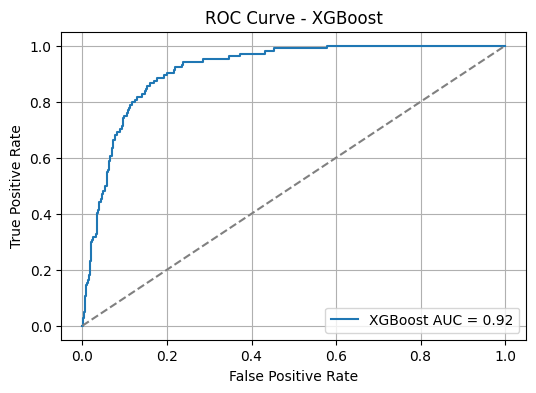

In [17]:
xgb_model = XGBClassifier(
    n_estimators=100,
    learning_rate=0.1,
    max_depth=4,
    subsample=0.8,
    colsample_bytree=0.8,
    eval_metric="logloss",
    random_state=42
)

# 1. 构建 Pipeline
pipeline_xgb = build_pipeline(numerical_cols, categorical_cols, xgb_model)

# 2. 模型训练
pipeline_xgb.fit(X_train, y_train)

# 3. 评估结果
evaluate_model(pipeline_xgb, X_test, y_test, model_name="XGBoost")


# 💡 LightGBM（Light Gradient Boosting Machine）

## 📘 模型简介

LightGBM 是微软开源的基于 GBDT 的高性能框架，专为大规模数据和高维稀疏场景优化，训练速度极快，准确率高，并支持 GPU 加速。

与传统 GBDT（如 sklearn 的 GradientBoosting）或 XGBoost 不同，LightGBM 使用了**基于直方图的高效算法和 leaf-wise 的生长策略**，大幅提升训练效率并降低内存消耗。

---

## 🔋 技术核心创新

| 技术点            | 解释 |
|-------------------|------|
| Histogram-based | 特征值离散化为直方图桶，加速分裂计算 |
| Leaf-wise growth | 选择增益最大的叶子生长（非层级）提升精度，但更易过拟合 |
| GOSS             | Gradient-based One-Side Sampling，保留大梯度样本，加速计算 |
| EFB              | Exclusive Feature Bundling，将互斥特征打包减少维度 |

---

## ⚙️ 常用参数

| 参数名                | 含义 |
|------------------------|------|
| `n_estimators`         | 树的数量 |
| `learning_rate`        | 学习率 |
| `max_depth`            | 最大深度（限制过拟合） |
| `num_leaves`           | 叶节点数量（控制模型复杂度） |
| `subsample`            | 数据子采样比例 |
| `colsample_bytree`     | 每棵树使用特征比例 |
| `reg_alpha` / `reg_lambda` | L1 / L2 正则 |
| `boosting_type`        | `gbdt`, `dart`, `goss` 等 |

---

## ✅ 优点总结

- 🚀 极快的训练速度（远快于 XGBoost / sklearn GBDT）
- 📦 内存占用低，适合大数据训练
- 🌲 支持类别特征原生处理（无需 OneHot）
- 🧠 精度高，支持高维稀疏特征场景
- ⚙️ 多种 Boosting 模式（GOSS / DART）

---

## ⚠️ 缺点

- 默认 `leaf-wise` 容易过拟合（需配合 `max_depth` 限制）
- 参数多，调参较复杂
- 对小数据集提升不如 XGBoost 显著

---

## 🧠 应用场景

- 超大表格类数据（CTR 预测、风险建模、推荐排序）
- 高维特征空间，如文本稀疏特征编码
- Kaggle、天池等竞赛中高速建模需求

---

下一步将使用 `LGBMClassifier` 在 `bank.csv` 数据上构建 Pipeline 模型并进行分类任务。


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Warning] min_data_in_leaf is set=1, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=1
[LightGBM] [Warning] min_data_in_leaf is set=1, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=1
[LightGBM] [Info] Number of positive: 417, number of negative: 3199
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000768 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 955
[LightGBM] [Info] Number of data points in the train set: 3616, number of used features: 51
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.115321 -> initscore=-2.037507
[LightGBM] [Info] Start training from score -2.037507
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain

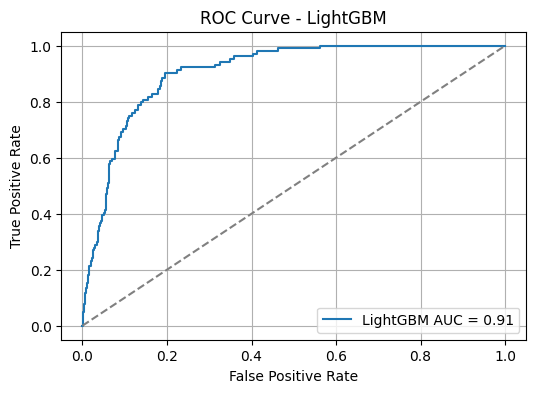

In [21]:
# 1. 定义 LightGBM 模型
lgbm_model = LGBMClassifier(
    n_estimators=100,
    learning_rate=0.1,
    num_leaves=31,
    max_depth=5,
    subsample=0.8,
    colsample_bytree=0.8,
    min_data_in_leaf=1,
    random_state=42
)

# 2. 构建 Pipeline
pipeline_lgbm = build_pipeline(numerical_cols, categorical_cols, lgbm_model)

# 3. 模型训练
pipeline_lgbm.fit(X_train, y_train)

# 4. 模型评估
evaluate_model(pipeline_lgbm, X_test, y_test, model_name="LightGBM")


# 🔧 树模型优化指南（Decision Tree / RF / GBDT / XGBoost / LightGBM）

## ✅ 通用优化策略（适用于所有树模型）

| 策略                          | 说明与作用                                         |
|-------------------------------|----------------------------------------------------|
| 🌲 限制树深度 `max_depth`        | 控制模型复杂度，防止过拟合                         |
| 🍃 控制叶子数量 `num_leaves`     | 特别适用于 GBDT/XGBoost/LightGBM 控制复杂度          |
| 🔢 设置最小分裂 `min_samples_split` / `min_child_samples` | 限制过小分裂，避免噪声造成模型膨胀             |
| 💡 学习率与迭代轮数组合        | `learning_rate ↓`, `n_estimators ↑` 提升鲁棒性      |
| 📦 子样本与特征子集抽样        | 使用 `subsample`, `colsample_bytree` 提升泛化能力     |
| 🧹 特征工程                  | 删除无信息特征，类别合并、填补缺失，提升建树质量       |
| 🧪 超参数调优                | 使用 `GridSearchCV` 或 `RandomizedSearchCV` 自动调参 |
| 🪓 正则化                    | 使用 `reg_alpha`, `reg_lambda` 控制模型复杂度         |

---

## ⚙️ 各模型专属优化建议

### 1️⃣ Decision Tree（单棵树）

- 限制 `max_depth=3~10`，防止树过深过拟合
- 设置 `min_samples_leaf=5~10`，避免噪声分裂
- 不推荐用于小样本高维数据

---

### 2️⃣ Random Forest（Bagging 多棵树）

- 设置 `n_estimators=100~500`
- 加入 `max_features='sqrt'` 控制每棵树特征使用量
- 对特征噪声不敏感，训练稳定，适合快速 baseline

---

### 3️⃣ GBDT（sklearn 原生版）

- 减小 `learning_rate=0.05~0.1`
- 增加 `n_estimators=200~500`
- 控制 `max_depth`，避免残差过拟合
- 训练速度比 XGBoost/LightGBM 慢，适合教学/小数据

---

### 4️⃣ XGBoost（工业级 GBDT）

推荐参数模板：

```python
XGBClassifier(
    n_estimators=300,
    learning_rate=0.05,
    max_depth=5,
    subsample=0.8,
    colsample_bytree=0.8,
    reg_lambda=1.0,  # L2 正则
    reg_alpha=0.0,   # L1 正则
    eval_metric='logloss'
)


# 🎓 树模型常见面试题 + 参考答案

以下问题覆盖了决策树、随机森林、GBDT、XGBoost、LightGBM 等常见树模型，是算法岗/数据岗/建模岗面试中高频出现内容。

---

## 🔹 决策树（Decision Tree）

### Q1: 决策树是如何构建的？
- 通过递归地选择最优特征分裂数据。
- 每次选择一个特征，使得分裂后子集“纯度”最大（如最大信息增益或最小 Gini）。
- 构建结束条件包括：纯度足够高、样本数太少、树达到最大深度等。

---

### Q2: Gini 与 Entropy 有什么区别？
| 项目      | Gini              | Entropy             |
|-----------|-------------------|---------------------|
| 数学定义  | \( 1 - $sum p_k^2 $) | \( -$sum p_k \log p_k $) |
| 含义      | 节点纯度          | 信息不确定性        |
| 特点      | 计算更快（无对数） | 有信息论解释        |
| 使用场景  | CART 默认         | ID3/C4.5 使用        |

---

### Q3: 决策树容易过拟合吗？如何解决？
- 是的，特别是深树或不剪枝时。
- 可通过：设置 `max_depth`、`min_samples_leaf`、`max_leaf_nodes`、使用剪枝、搭配集成方法（如 RF、GBDT）来缓解。

---

## 🔹 随机森林（Random Forest）

### Q4: 随机森林与决策树的本质区别？
- 决策树只有一棵，易过拟合；随机森林是多棵树的集成，投票决策。
- 随机性来源：
  - Bootstrap 抽样（样本随机）
  - 每个节点只考虑部分特征（特征随机）

---

### Q5: 随机森林为什么抗过拟合？
- 通过 Bagging 的思想降低模型方差。
- 多棵树组合后，单棵树的过拟合偏差不会直接反映在最终输出中。
- 投票/平均机制具有稳定性。

---

### Q6: 随机森林能解释特征重要性吗？
- 可以，基于两个思路：
  1. **基于分裂增益**：特征每次带来的信息增益总和。
  2. **基于模型退化**（Permutation Importance）：打乱某列后精度下降程度。

---

## 🔹 GBDT / XGBoost / LightGBM

### Q7: GBDT 是如何工作的？
- 使用加法模型和前向分步算法：
  - 每轮学习前一轮的残差（或损失的一阶梯度）
  - 拟合残差的弱学习器（通常是小树）
  - 将预测结果累加起来逼近目标函数

---

### Q8: GBDT 与随机森林的主要区别？
| 项目          | GBDT                         | Random Forest               |
|---------------|------------------------------|-----------------------------|
| 思想          | Boosting（加法模型）          | Bagging（并行投票）         |
| 学习方式      | 每轮基于上一轮残差            | 每棵树独立训练              |
| 误差优化      | 拟合残差/梯度                 | 多样性 + 投票降方差         |
| 模型叠加方式  | 累加                          | 多数投票（分类）/均值（回归）|

---

### Q9: XGBoost 对 GBDT 有哪些改进？
- 加入了正则项（防过拟合）
- 二阶导数（更精确拟合残差）
- 支持并行特征分裂
- 提供 early stopping
- 缓存优化，内存占用低

---

### Q10: XGBoost 和 LightGBM 的区别？
| 项目            | XGBoost                    | LightGBM                    |
|-----------------|----------------------------|-----------------------------|
| 分裂策略        | Level-wise（层生长）         | Leaf-wise（叶生长）         |
| 分裂算法        | 贪心 + 精确/近似分裂          | 直方图 + GOSS + EFB         |
| 训练速度        | 快                         | 更快（10x）                |
| 适合场景        | 结构化中小规模数据           | 高维稀疏 + 大规模数据       |
| 支持类别特征    | 需编码                      | 原生支持 categorical       |

---

### Q11: 什么是 GOSS 与 EFB？
- GOSS（Gradient-based One-Side Sampling）：保留大梯度样本，加速训练。
- EFB（Exclusive Feature Bundling）：将互斥的稀疏特征打包，减少维度。

---

### Q12: 为什么 LightGBM 更容易过拟合？
- 使用 Leaf-wise 策略更容易生成“极深的叶子”，导致对训练集拟合过强。
- 解决方法：
  - 设置 `max_depth`
  - 调整 `min_child_samples`
  - 使用正则项

---

### Q13: 你如何进行树模型调参？
- Step 1: 先确定 `max_depth`, `min_samples_leaf`（控制复杂度）
- Step 2: 调整 `learning_rate` 与 `n_estimators` 组合
- Step 3: 引入 `subsample`, `colsample_bytree` 引入随机性
- Step 4: 加入 `reg_alpha`, `reg_lambda` 控制正则
- Step 5: 使用 `GridSearchCV` 或 `RandomizedSearchCV` 自动调参

---

### Q14: 如何评估树模型效果？
- 分类任务：`Accuracy`, `Precision`, `Recall`, `F1`, `AUC`
- 回归任务：`MSE`, `RMSE`, `R²`
- 可视化：Confusion Matrix, ROC 曲线
- 训练时评估：OOB Score（随机森林）, Early Stopping（Boosting）


##补充

## 🔁 Bagging（Bootstrap Aggregating）

### 定义：
- 将训练数据有放回采样，构造多个子数据集
- 在每个子集上训练一个独立模型（如决策树）
- 通过多数投票（分类）或平均（回归）集成预测结果

### 特点：
- 并行训练
- 主要降低**方差**
- 易于并行化实现
- 对噪声鲁棒（如 Random Forest）

---

## 🔂 Boosting

### 定义：
- 模型按顺序迭代训练，每轮关注上轮错分样本或残差
- 每个弱学习器都在拟合当前的错误
- 最终预测为所有弱学习器加权结果

### 特点：
- 串行训练
- 主要降低**偏差**
- 可自适应关注难学样本
- 易过拟合，需调参（如 GBDT、XGBoost、LightGBM）

---

## 🔍 对比表

| 项目           | Bagging                     | Boosting                    |
|----------------|-----------------------------|-----------------------------|
| 基本策略       | 并行训练多个弱模型            | 逐步拟合误差，串行训练       |
| 样本选择       | Bootstrap 采样                | 每轮基于前一轮残差/错误      |
| 偏差/方差      | 降低方差                    | 降低偏差                    |
| 抗过拟合能力   | 强（如 RF）                 | 弱（易过拟合）              |
| 训练可并行     | ✅                          | ❌（部分可特征级并行）       |
| 常见代表模型   | Random Forest               | GBDT / XGBoost / LightGBM  |

---

## 面试常见问题与答案

### Q1: Bagging 与 Boosting 有什么本质区别？
**答：**
- Bagging 是并行训练，着重于降低模型方差，适合高方差模型（如决策树）。
- Boosting 是串行训练，每一轮修正上轮错误，着重于降低偏差，但更容易过拟合。

---

### Q2: 为什么随机森林抗过拟合，而 GBDT 更容易过拟合？
**答：**
- RF 中每棵树训练数据和特征都不同，投票机制提高稳定性。
- GBDT 是累加模型，残差持续拟合，易对训练集过拟合，需调 `learning_rate` 和 `max_depth` 控制。

---

### Q3: Boosting 中为什么需要学习率？
**答：**
- 控制每棵树对最终模型的贡献（即步长 shrinkage）
- 学习率越小，训练越慢但泛化能力更强
- 通常搭配增加 `n_estimators` 来达到更好效果

---

### Q4: Bagging 模型可以使用弱模型以外的吗？
**答：**
- 可以，但通常使用高方差模型（如 Decision Tree）
- 若使用线性回归等低方差模型，提升有限

---

### Q5: Boosting 中的每一轮学到了什么？
**答：**
- 每一轮都学的是“当前模型的残差”
- GBDT 学的是损失函数对预测的梯度
- 本质是梯度下降在函数空间中的一种形式